#Data Synthesis and Preprocessing

In [ ]:
pip install faker

In [ ]:
from faker import Faker
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define probabilities for generating biased data
bias_probabilities = {
    'Question 1': {'Yes': 0.4, 'No': 0.6},
    'Question 2': {'Yes': 0.6, 'No': 0.4},
    'Question 3': {'Yes': 0.3, 'No': 0.7},
    'Question 4': {'Yes': 0.2, 'No': 0.8},
    'Question 5': {'Yes': 0.4, 'No': 0.6}
}

In [ ]:
random.choices(list(bias_probabilities['Question 1'].keys()), weights=bias_probabilities['Question 1'].values())[0]

'No'

In [ ]:
# Create a Faker instance with 'en_IN' locale
fake = Faker('en_IN')

# Dictionary containing Indian states with their latitudes and longitudes
indian_states_data = {
    'Andhra Pradesh': [15.9129, 79.7400],
    'Arunachal Pradesh': [28.2180, 94.7278],
    'Assam': [26.2006, 92.9376],
    'Bihar': [25.0961, 85.3131],
    'Chhattisgarh': [21.2787, 81.8661],
    'Goa': [15.2993, 74.1240],
    'Gujarat': [22.2587, 71.1924],
    'Haryana': [29.0588, 76.0856],
    'Himachal Pradesh': [31.1048, 77.1734],
    'Jharkhand': [23.6102, 85.2799],
    'Karnataka': [15.3173, 75.7139],
    'Kerala': [10.8505, 76.2711],
    'Madhya Pradesh': [22.9734, 78.6569],
    'Maharashtra': [19.7515, 75.7139],
    'Manipur': [24.6637, 93.9063],
    'Meghalaya': [25.4670, 91.3662],
    'Mizoram': [23.1645, 92.9376],
    'Nagaland': [26.1584, 94.5624],
    'Odisha': [20.9517, 85.0985],
    'Punjab': [31.1471, 75.3412],
    'Rajasthan': [27.0238, 74.2179],
    'Sikkim': [27.5330, 88.5122],
    'Tamil Nadu': [11.1271, 78.6569],
    'Telangana': [17.1232, 79.2088],
    'Tripura': [23.9408, 91.9882],
    'Uttar Pradesh': [26.8467, 80.9462],
    'Uttarakhand': [30.0668, 79.0193],
    'West Bengal': [22.9868, 87.8550],
    'Andaman and Nicobar Islands': [11.7401, 92.6586],
    'Chandigarh': [30.7333, 76.7794],
    'Dadra and Nagar Haveli and Daman and Diu': [20.1809, 73.0169],
    'Delhi': [28.7041, 77.1025],
    'Lakshadweep': [10.5667, 72.6417],
    'Puducherry': [11.9416, 79.8083]
}

# Function to generate fake data with random latitudes and longitudes within the bounds of India
def generate_fake_data(num_samples):
    dataset = []
    for _ in range(num_samples):
        name = fake.name()
        age = random.randint(5, 10)
        state = random.choice(list(indian_states_data.keys()))
        lat, lon = indian_states_data[state]
        q1 = random.choices(list(bias_probabilities['Question 1'].keys()), weights=bias_probabilities['Question 1'].values())[0]
        q2 = random.choices(list(bias_probabilities['Question 2'].keys()), weights=bias_probabilities['Question 2'].values())[0]
        q3 = random.choices(list(bias_probabilities['Question 3'].keys()), weights=bias_probabilities['Question 3'].values())[0]
        q4 = random.choices(list(bias_probabilities['Question 4'].keys()), weights=bias_probabilities['Question 4'].values())[0]
        q5 = random.choices(list(bias_probabilities['Question 5'].keys()), weights=bias_probabilities['Question 5'].values())[0]
        dataset.append({
            'Name': name,
            'Age': age,
            'State': state,
            'Latitude': lat + random.uniform(-1, 1),  # Adding slight random variation to latitude
            'Longitude': lon + random.uniform(-1, 1),  # Adding slight random variation to longitude
            'Question 1': q1,
            'Question 2': q2,
            'Question 3': q3,
            'Question 4': q4,
            'Question 5': q5
        })
    return dataset

# Generate fake data
fake_dataset = generate_fake_data(1000)

# Print the first few samples
for data in fake_dataset[:5]:
    print(data)


{'Name': 'Dishani Rajagopal', 'Age': 5, 'State': 'Haryana', 'Latitude': 29.562567572496413, 'Longitude': 76.78384435370482, 'Question 1': 'No', 'Question 2': 'No', 'Question 3': 'Yes', 'Question 4': 'Yes', 'Question 5': 'No'}
{'Name': 'Ryan Sridhar', 'Age': 10, 'State': 'Punjab', 'Latitude': 31.117350776717895, 'Longitude': 74.98187673646768, 'Question 1': 'No', 'Question 2': 'No', 'Question 3': 'No', 'Question 4': 'Yes', 'Question 5': 'Yes'}
{'Name': 'Rhea Shukla', 'Age': 6, 'State': 'Manipur', 'Latitude': 25.139633797074648, 'Longitude': 93.86671489879859, 'Question 1': 'Yes', 'Question 2': 'No', 'Question 3': 'Yes', 'Question 4': 'No', 'Question 5': 'No'}
{'Name': 'Sara Agate', 'Age': 8, 'State': 'Arunachal Pradesh', 'Latitude': 28.13571217407486, 'Longitude': 94.21405973586168, 'Question 1': 'No', 'Question 2': 'Yes', 'Question 3': 'No', 'Question 4': 'No', 'Question 5': 'No'}
{'Name': 'Samar Soni', 'Age': 7, 'State': 'Goa', 'Latitude': 15.148383579795267, 'Longitude': 73.263388610

In [ ]:
good_bad_touch = pd.DataFrame(fake_dataset)
good_bad_touch.columns = ["Name", "Age", "State", "Latitude", "Longitude", "touch_private_parts_without_consent", "approach_grownup_when_feeling_unsafe", "speakup_if_touched_inappropriately", "say_no_if_inappropriate_touch", "physical_contact_if_uncomfortable"]

In [ ]:
good_bad_touch.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,Yes,Yes,No
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,No,Yes,Yes
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,Yes,No,No
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,No,No,No
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,No,No,No


In [ ]:
print("1. Do you have a special place where you put all the garbage in your neighborhood?")
print("2. Do you know why it’s important to keep yourself and your surroundings clean?")
print("3. Do you use a toothbrush and toothpaste to brush your teeth everyday ?")
print("4. Do you know ways to prevent getting sick, like staying away from dirty areas?")
print("5. Do you keep your nails clean ?")

fake_data2 = generate_fake_data(1000)
for data in fake_data2[:5]:
    print(data)

1. Do you have a special place where you put all the garbage in your neighborhood?
2. Do you know why it’s important to keep yourself and your surroundings clean?
3. Do you use a toothbrush and toothpaste to brush your teeth everyday ?
4. Do you know ways to prevent getting sick, like staying away from dirty areas?
5. Do you keep your nails clean ?
{'Name': 'Rohan Bora', 'Age': 5, 'State': 'Tamil Nadu', 'Latitude': 10.480228263129131, 'Longitude': 77.83191379097599, 'Question 1': 'No', 'Question 2': 'Yes', 'Question 3': 'No', 'Question 4': 'No', 'Question 5': 'Yes'}
{'Name': 'Aniruddh Rajagopalan', 'Age': 8, 'State': 'Haryana', 'Latitude': 28.370631492261086, 'Longitude': 75.9807112218305, 'Question 1': 'Yes', 'Question 2': 'Yes', 'Question 3': 'No', 'Question 4': 'Yes', 'Question 5': 'Yes'}
{'Name': 'Manjari Kade', 'Age': 6, 'State': 'Gujarat', 'Latitude': 22.68982964409434, 'Longitude': 70.5820611004605, 'Question 1': 'No', 'Question 2': 'No', 'Question 3': 'No', 'Question 4': 'No', 

In [ ]:
cleanliness = pd.DataFrame(fake_data2)
cleanliness.columns=["Name", "Age", "State", "Latitude", "Longitude", "garbage_disposal", "importance_of_clean_surrounding", "dental_care", "sickness_prevention", "clean_nails"]
cleanliness.head()

,Name,Age,State,Latitude,Longitude,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails
0,Rohan Bora,5,Tamil Nadu,10.480228,77.831914,No,Yes,No,No,Yes
1,Aniruddh Rajagopalan,8,Haryana,28.370631,75.980711,Yes,Yes,No,Yes,Yes
2,Manjari Kade,6,Gujarat,22.689830,70.582061,No,No,No,No,Yes
3,Pihu Mane,8,Chandigarh,30.638282,77.611663,No,No,Yes,Yes,No
4,Samarth Gera,7,Puducherry,11.618256,79.630037,No,No,No,No,No


In [ ]:
print("""1. Do you have access to a school or a learning centre?
2. ⁠If you do have a learning centre, do you have a teacher or someone who helps you learn?
3. ⁠Do you have books or study materials to study from?
4. ⁠Do you like learning new things regularly ?
5. ⁠Do you go to a place to learn with other kids?""")

fake_data3= generate_fake_data(1000)
for data in fake_data3[:5]:
    print(data)

1. Do you have access to a school or a learning centre?
2. ⁠If you do have a learning centre, do you have a teacher or someone who helps you learn?
3. ⁠Do you have books or study materials to study from?
4. ⁠Do you like learning new things regularly ?
5. ⁠Do you go to a place to learn with other kids?
{'Name': 'Saksham Kale', 'Age': 8, 'State': 'West Bengal', 'Latitude': 22.574937399669366, 'Longitude': 88.2324442555293, 'Question 1': 'Yes', 'Question 2': 'Yes', 'Question 3': 'No', 'Question 4': 'No', 'Question 5': 'No'}
{'Name': 'Divit Tailor', 'Age': 5, 'State': 'Karnataka', 'Latitude': 16.153711971084803, 'Longitude': 76.56397207034371, 'Question 1': 'Yes', 'Question 2': 'No', 'Question 3': 'No', 'Question 4': 'Yes', 'Question 5': 'No'}
{'Name': 'Onkar Devi', 'Age': 10, 'State': 'Meghalaya', 'Latitude': 25.05291778722299, 'Longitude': 90.56430340524604, 'Question 1': 'Yes', 'Question 2': 'No', 'Question 3': 'No', 'Question 4': 'No', 'Question 5': 'No'}
{'Name': 'Tushar Sarna', 'Age'

In [ ]:
education = pd.DataFrame(fake_data3)
education.head()

,Name,Age,State,Latitude,Longitude,Question 1,Question 2,Question 3,Question 4,Question 5
0,Saksham Kale,8,West Bengal,22.574937,88.232444,Yes,Yes,No,No,No
1,Divit Tailor,5,Karnataka,16.153712,76.563972,Yes,No,No,Yes,No
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,Yes,No,No,No,No
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,No,Yes,Yes,No,Yes
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,Yes,Yes,Yes,No,No


In [ ]:
education.columns = ["Name", "Age", "State", "Latitude", "Longitude","school_access" ,"has_teacher","study_material","likes_learning","learn_with_others"]
education.head()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others
0,Saksham Kale,8,West Bengal,22.574937,88.232444,Yes,Yes,No,No,No
1,Divit Tailor,5,Karnataka,16.153712,76.563972,Yes,No,No,Yes,No
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,Yes,No,No,No,No
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,No,Yes,Yes,No,Yes
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,Yes,Yes,Yes,No,No


##Good_Bad_Touch


In [ ]:
good_bad_touch.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,Yes,Yes,No
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,No,Yes,Yes
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,Yes,No,No
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,No,No,No
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,No,No,No


In [ ]:
df = good_bad_touch

# Convert string representations to actual boolean values
df[['touch_private_parts_without_consent', 'approach_grownup_when_feeling_unsafe',
    'speakup_if_touched_inappropriately', 'say_no_if_inappropriate_touch',
    'physical_contact_if_uncomfortable']] = df[['touch_private_parts_without_consent',
                                                'approach_grownup_when_feeling_unsafe',
                                                'speakup_if_touched_inappropriately',
                                                'say_no_if_inappropriate_touch',
                                                'physical_contact_if_uncomfortable']].applymap(lambda x: x == 'Yes')

# Add a new column 'message' based on conditions
conditions = [
    (~df['touch_private_parts_without_consent']) & (~df['approach_grownup_when_feeling_unsafe']) & (~df['speakup_if_touched_inappropriately']) & (~df['say_no_if_inappropriate_touch']) & (~df['physical_contact_if_uncomfortable']),
    (~df['touch_private_parts_without_consent']) & (~df['approach_grownup_when_feeling_unsafe']) & (~df['speakup_if_touched_inappropriately']) & (~df['say_no_if_inappropriate_touch']),
    (~df['touch_private_parts_without_consent']) & (~df['approach_grownup_when_feeling_unsafe']) & (~df['speakup_if_touched_inappropriately']),
    (~df['touch_private_parts_without_consent']) & (~df['approach_grownup_when_feeling_unsafe']),
    (~df['touch_private_parts_without_consent']),
    (~df['approach_grownup_when_feeling_unsafe']) & (~df['speakup_if_touched_inappropriately']) & (~df['say_no_if_inappropriate_touch']) & (~df['physical_contact_if_uncomfortable']),
    (~df['approach_grownup_when_feeling_unsafe']) & (~df['speakup_if_touched_inappropriately']) & (~df['say_no_if_inappropriate_touch']),
    (~df['approach_grownup_when_feeling_unsafe']) & (~df['speakup_if_touched_inappropriately']),
    (~df['approach_grownup_when_feeling_unsafe']),
    (~df['speakup_if_touched_inappropriately']) & (~df['say_no_if_inappropriate_touch']) & (~df['physical_contact_if_uncomfortable']),
    (~df['speakup_if_touched_inappropriately']) & (~df['say_no_if_inappropriate_touch']),
    (~df['speakup_if_touched_inappropriately']),
    (~df['say_no_if_inappropriate_touch']) & (~df['physical_contact_if_uncomfortable']),
    (~df['physical_contact_if_uncomfortable'])
]

# Messages for each condition
messages = [
    "Your body belongs to you, and it's important to always feel safe. If someone makes you feel uncomfortable, say 'No' and tell a grown-up you trust. Remember, you have the right to decide who can touch your body. Don't keep it a secret if something doesn't feel right.",
    "Your body is yours. If something feels wrong, speak up to a grown-up you trust. You have the right to say no and feel safe.",
    "Your body is yours. If something feels wrong, speak up to a grown-up you trust. You have the right to say no and feel safe.",
    "If something feels wrong, talk to a grown-up you trust. You have the right to feel safe and speak up.",
    "Your body is yours. You have the right to feel safe and decide who can touch you.",
    "Talk to a trusted grown-up if you feel uncomfortable. Your feelings are important, and you have the right to say no to anything that makes you uncomfortable.",
    "If something feels wrong, don't be afraid to speak up. You have the right to say no and feel safe.",
    "Trust your feelings and talk to a grown-up you trust if you feel uncomfortable. You have the right to say no and feel safe.",
    "If you ever feel scared or uncomfortable, talk to a grown-up you trust. They are there to help you feel safe.",
    "If something feels wrong, it's important to speak up. You have the right to decide who can touch you and to feel comfortable with physical contact.",
    "Your feelings matter. Speak up if something doesn't feel right. You have the right to say no and feel safe.",
    "Trust yourself. If something feels wrong, tell a grown-up you trust. You have the right to feel safe.",
    "If someone wants to touch you in a way that feels strange, it's okay to say no. Your feelings are important, and you have the right to feel comfortable with physical contact.",
    "It's okay to set boundaries with physical contact. You have the right to feel comfortable and safe."
]

# Add 'message' column based on conditions
for condition, message in zip(conditions, messages):
    df.loc[condition, 'message'] = message

df.head()


,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,False,False,True,True,False,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,False,False,False,True,True,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,True,False,True,False,False,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,False,True,False,False,False,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,True,False,False,False,False,It's okay to set boundaries with physical cont...


In [ ]:
df["touch_private_parts_without_consent"] = df["touch_private_parts_without_consent"].map({True: "Yes", False: "No"})
df.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,False,True,True,False,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,False,False,True,True,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,False,True,False,False,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,True,False,False,False,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,False,False,False,False,It's okay to set boundaries with physical cont...


In [ ]:
df["approach_grownup_when_feeling_unsafe"] = df["approach_grownup_when_feeling_unsafe"].map({True: "Yes", False: "No"})
df.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,True,True,False,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,False,True,True,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,True,False,False,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,False,False,False,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,False,False,False,It's okay to set boundaries with physical cont...


In [ ]:
#df["speakup_if_touched_inappropriately"] = df["speakup_if_touched_inappropriately"].map({True: "Yes", False: "No"})
df["say_no_if_inappropriate_touch"] = df["say_no_if_inappropriate_touch"].map({True: "Yes", False: "No"})
df["speakup_if_touched_inappropriately"] = df["speakup_if_touched_inappropriately"].map({True: "Yes", False: "No"})
df.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,Yes,Yes,False,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,No,Yes,True,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,Yes,No,False,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,No,No,False,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,No,No,False,It's okay to set boundaries with physical cont...


In [ ]:
df["physical_contact_if_uncomfortable"] = df["physical_contact_if_uncomfortable"].map({True: "Yes", False: "No"})
df.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,Yes,Yes,No,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,No,Yes,Yes,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,Yes,No,No,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,No,No,No,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,No,No,No,It's okay to set boundaries with physical cont...


In [ ]:
good_bad_touch = df
good_bad_touch.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,Yes,Yes,No,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,No,Yes,Yes,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,Yes,No,No,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,No,No,No,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,No,No,No,It's okay to set boundaries with physical cont...


In [ ]:
good_bad_touch.isna().sum()

Name                                     0
Age                                      0
State                                    0
Latitude                                 0
Longitude                                0
touch_private_parts_without_consent      0
approach_grownup_when_feeling_unsafe     0
speakup_if_touched_inappropriately       0
say_no_if_inappropriate_touch            0
physical_contact_if_uncomfortable        0
message                                 24
dtype: int64

In [ ]:
good_bad_touch.ffill(inplace=True)

In [ ]:
good_bad_touch.isna().sum()

Name                                    0
Age                                     0
State                                   0
Latitude                                0
Longitude                               0
touch_private_parts_without_consent     0
approach_grownup_when_feeling_unsafe    0
speakup_if_touched_inappropriately      0
say_no_if_inappropriate_touch           0
physical_contact_if_uncomfortable       0
message                                 0
dtype: int64

In [ ]:
good_bad_touch.to_csv("good_bad_touch.csv", index=False)

##Cleanliness

In [ ]:
cleanliness.head()

,Name,Age,State,Latitude,Longitude,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails
0,Rohan Bora,5,Tamil Nadu,10.480228,77.831914,No,Yes,No,No,Yes
1,Aniruddh Rajagopalan,8,Haryana,28.370631,75.980711,Yes,Yes,No,Yes,Yes
2,Manjari Kade,6,Gujarat,22.689830,70.582061,No,No,No,No,Yes
3,Pihu Mane,8,Chandigarh,30.638282,77.611663,No,No,Yes,Yes,No
4,Samarth Gera,7,Puducherry,11.618256,79.630037,No,No,No,No,No


In [ ]:
df = cleanliness

# Convert string representations to actual boolean values
df[['garbage_disposal', 'importance_of_clean_surrounding',
    'dental_care', 'sickness_prevention',
    'clean_nails']] = df[['garbage_disposal', 'importance_of_clean_surrounding',
                      'dental_care', 'sickness_prevention',
                      'clean_nails']].applymap(lambda x: x == 'Yes')

# Add a new column 'message' based on conditions
conditions = [
    (~df['garbage_disposal']) & (~df['importance_of_clean_surrounding']) & (~df['dental_care']) & (~df['sickness_prevention']) & (~df['clean_nails']),
    (~df['garbage_disposal']) & (~df['importance_of_clean_surrounding']) & (~df['dental_care']) & (~df['sickness_prevention']),
    (~df['garbage_disposal']) & (~df['importance_of_clean_surrounding']) & (~df['dental_care']),
    (~df['garbage_disposal']) & (~df['importance_of_clean_surrounding']),
    (~df['garbage_disposal']),
    (~df['importance_of_clean_surrounding']) & (~df['dental_care']) & (~df['sickness_prevention']) & (~df['clean_nails']),
    (~df['importance_of_clean_surrounding']) & (~df['dental_care']) & (~df['sickness_prevention']),
    (~df['importance_of_clean_surrounding']) & (~df['dental_care']),
    (~df['importance_of_clean_surrounding']),
    (~df['dental_care']) & (~df['sickness_prevention']) & (~df['clean_nails']),
    (~df['dental_care']) & (~df['sickness_prevention']),
    (~df['dental_care']),
    (~df['sickness_prevention']) & (~df['clean_nails']),
    (~df['clean_nails'])
]

# Messages for each condition
messages = [
    "Remember to dispose of garbage properly and keep your surroundings clean. Take care of your teeth, prevent sickness, and keep your nails clean for overall health and hygiene.",
    "Proper garbage disposal and cleanliness are important for good health. Remember to prioritize dental care and sickness prevention for overall well-being.",
    "Dispose of garbage properly and maintain a clean environment. Along with that, prioritize dental care for a healthy smile and overall well-being.",
    "Proper garbage disposal contributes to a clean environment and good health. Remember the importance of cleanliness for overall well-being.",
    "Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.",
    "Maintaining cleanliness is crucial for good health. Prioritize dental care, sickness prevention, and clean nails for overall hygiene and well-being.",
    "A clean environment promotes good health. Prioritize dental care and sickness prevention for overall well-being and hygiene.",
    "Maintaining a clean environment is essential for good health. Remember to prioritize dental care for a healthy smile and overall well-being.",
    "A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.",
    "Take care of your teeth, prevent sickness, and keep your nails clean for overall health and hygiene.",
    "Prioritize dental care and sickness prevention for a healthy smile and overall well-being.",
    "Take care of your teeth for a healthy smile and overall well-being.",
    "Prevent sickness and keep your nails clean for overall health and hygiene.",
    "Keep your nails clean for good hygiene and overall well-being."
]

# Add 'message' column based on conditions
for condition, message in zip(conditions, messages):
    df.loc[condition, 'message'] = message

df.head()

,Name,Age,State,Latitude,Longitude,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails,message
0,Rohan Bora,5,Tamil Nadu,10.480228,77.831914,False,True,False,False,True,Take care of your teeth for a healthy smile an...
1,Aniruddh Rajagopalan,8,Haryana,28.370631,75.980711,True,True,False,True,True,Take care of your teeth for a healthy smile an...
2,Manjari Kade,6,Gujarat,22.689830,70.582061,False,False,False,False,True,Take care of your teeth for a healthy smile an...
3,Pihu Mane,8,Chandigarh,30.638282,77.611663,False,False,True,True,False,Keep your nails clean for good hygiene and ove...
4,Samarth Gera,7,Puducherry,11.618256,79.630037,False,False,False,False,False,Keep your nails clean for good hygiene and ove...


In [ ]:
df["garbage_disposal"] = df["garbage_disposal"].map({True: "Yes", False: "No"})
df["importance_of_clean_surrounding"] = df["importance_of_clean_surrounding"].map({True: "Yes", False: "No"})
df["dental_care"] = df["dental_care"].map({True: "Yes", False: "No"})
df["sickness_prevention"] = df["sickness_prevention"].map({True: "Yes", False: "No"})
df["clean_nails"] = df["clean_nails"].map({True: "Yes", False: "No"})
df.head()

,Name,Age,State,Latitude,Longitude,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails,message
0,Rohan Bora,5,Tamil Nadu,10.480228,77.831914,No,Yes,No,No,Yes,Take care of your teeth for a healthy smile an...
1,Aniruddh Rajagopalan,8,Haryana,28.370631,75.980711,Yes,Yes,No,Yes,Yes,Take care of your teeth for a healthy smile an...
2,Manjari Kade,6,Gujarat,22.689830,70.582061,No,No,No,No,Yes,Take care of your teeth for a healthy smile an...
3,Pihu Mane,8,Chandigarh,30.638282,77.611663,No,No,Yes,Yes,No,Keep your nails clean for good hygiene and ove...
4,Samarth Gera,7,Puducherry,11.618256,79.630037,No,No,No,No,No,Keep your nails clean for good hygiene and ove...


In [ ]:
cleanliness = df
cleanliness.head()

,Name,Age,State,Latitude,Longitude,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails,message
0,Rohan Bora,5,Tamil Nadu,10.480228,77.831914,No,Yes,No,No,Yes,Take care of your teeth for a healthy smile an...
1,Aniruddh Rajagopalan,8,Haryana,28.370631,75.980711,Yes,Yes,No,Yes,Yes,Take care of your teeth for a healthy smile an...
2,Manjari Kade,6,Gujarat,22.689830,70.582061,No,No,No,No,Yes,Take care of your teeth for a healthy smile an...
3,Pihu Mane,8,Chandigarh,30.638282,77.611663,No,No,Yes,Yes,No,Keep your nails clean for good hygiene and ove...
4,Samarth Gera,7,Puducherry,11.618256,79.630037,No,No,No,No,No,Keep your nails clean for good hygiene and ove...


In [ ]:
cleanliness.isna().sum()

Name                                0
Age                                 0
State                               0
Latitude                            0
Longitude                           0
garbage_disposal                    0
importance_of_clean_surrounding     0
dental_care                         0
sickness_prevention                 0
clean_nails                         0
message                            31
dtype: int64

In [ ]:
cleanliness.ffill(inplace=True)
cleanliness.isna().sum()

Name                               0
Age                                0
State                              0
Latitude                           0
Longitude                          0
garbage_disposal                   0
importance_of_clean_surrounding    0
dental_care                        0
sickness_prevention                0
clean_nails                        0
message                            0
dtype: int64

In [ ]:
cleanliness.to_csv("cleanliness.csv", index=False)

##Education

In [ ]:
education.head()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others
0,Saksham Kale,8,West Bengal,22.574937,88.232444,Yes,Yes,No,No,No
1,Divit Tailor,5,Karnataka,16.153712,76.563972,Yes,No,No,Yes,No
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,Yes,No,No,No,No
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,No,Yes,Yes,No,Yes
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,Yes,Yes,Yes,No,No


In [ ]:
education.columns

Index(['Name', 'Age', 'State', 'Latitude', 'Longitude', 'school_access',
       'has_teacher', 'study_material', 'likes_learning', 'learn_with_others'],
      dtype='object')

In [ ]:
df = education

# Convert string representations to actual boolean values
df[['school_access', 'has_teacher', 'study_material',
       'likes_learning', 'learn_with_others']] = df[['school_access', 'has_teacher', 'study_material',
                                                     'likes_learning', 'learn_with_others']].applymap(lambda x: x == 'Yes')

# Add a new column 'message' based on conditions
conditions = [
    (~df['school_access']) & (~df['has_teacher']) & (~df['study_material']) & (~df['likes_learning']) & (~df['learn_with_others']),
    (~df['school_access']) & (~df['has_teacher']) & (~df['study_material']) & (~df['likes_learning']),
    (~df['school_access']) & (~df['has_teacher']) & (~df['study_material']),
    (~df['school_access']) & (~df['has_teacher']),
    (~df['school_access']),
    (~df['has_teacher']) & (~df['study_material']) & (~df['likes_learning']) & (~df['learn_with_others']),
    (~df['has_teacher']) & (~df['study_material']) & (~df['likes_learning']),
    (~df['has_teacher']) & (~df['study_material']),
    (~df['has_teacher']),
    (~df['study_material']) & (~df['likes_learning']) & (~df['learn_with_others']),
    (~df['study_material']) & (~df['likes_learning']),
    (~df['study_material']),
    (~df['likes_learning']) & (~df['learn_with_others']),
    (~df['learn_with_others'])
]

# Messages for each condition
messages = [
    "Learning is fun and easier when you have access to a school and enjoy learning with others. Keep discovering new things!",
    "Find someone who can teach you, be it a friend or a teacher and try to make notes of what you learn to make learning enjoyable.",
    "Find someone who can teach you, be it a friend or a teacher. This makes learning easy and enjoyable.",
    "Access to a school and a teacher is a wonderful opportunity for learning. Keep exploring new topics.",
    "Try learning on your own. Don't let your curiosity and willingness to learn go away.",
    "Learning becomes more enjoyable when you have a teacher, study materials, and enjoy learning with others. Keep working together and discovering new things!",
    "Keep up the enthusiasm and keep learning!",
    "Keep exploring and discovering new things!",
    "Be your own teacher! Try to learn on your own and never give up.",
    "Enjoy learning with study materials and friends. Keep exploring together and sharing your discoveries!",
    "Enjoy learning with study materials and keep nurturing your curiosity. Keep exploring new topics and expanding your knowledge!",
    "Try making notes of your own. They would help you understand the concepts even if you do not have study material!",
    "Learning is more enjoyable when you like it and learn with others. Keep collaborating and sharing your knowledge!",
    "Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends."
]

# Add 'message' column based on conditions
for condition, message in zip(conditions, messages):
    df.loc[condition, 'message'] = message

df.head()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
0,Saksham Kale,8,West Bengal,22.574937,88.232444,True,True,False,False,False,Knowledge increases when you share it with oth...
1,Divit Tailor,5,Karnataka,16.153712,76.563972,True,False,False,True,False,Knowledge increases when you share it with oth...
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,True,False,False,False,False,Knowledge increases when you share it with oth...
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,False,True,True,False,True,Try learning on your own. Don't let your curio...
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,True,True,True,False,False,Knowledge increases when you share it with oth...


In [ ]:
df["school_access"] = df["school_access"].map({True: "Yes", False: "No"})
df["has_teacher"] = df["has_teacher"].map({True: "Yes", False: "No"})
df["study_material"] = df["study_material"].map({True: "Yes", False: "No"})
df["likes_learning"] = df["likes_learning"].map({True: "Yes", False: "No"})
df["learn_with_others"] = df["learn_with_others"].map({True: "Yes", False: "No"})
df.head()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
0,Saksham Kale,8,West Bengal,22.574937,88.232444,Yes,Yes,No,No,No,Knowledge increases when you share it with oth...
1,Divit Tailor,5,Karnataka,16.153712,76.563972,Yes,No,No,Yes,No,Knowledge increases when you share it with oth...
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,Yes,No,No,No,No,Knowledge increases when you share it with oth...
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,No,Yes,Yes,No,Yes,Try learning on your own. Don't let your curio...
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,Yes,Yes,Yes,No,No,Knowledge increases when you share it with oth...


In [ ]:
education = df
education.head()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
0,Saksham Kale,8,West Bengal,22.574937,88.232444,Yes,Yes,No,No,No,Knowledge increases when you share it with oth...
1,Divit Tailor,5,Karnataka,16.153712,76.563972,Yes,No,No,Yes,No,Knowledge increases when you share it with oth...
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,Yes,No,No,No,No,Knowledge increases when you share it with oth...
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,No,Yes,Yes,No,Yes,Try learning on your own. Don't let your curio...
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,Yes,Yes,Yes,No,No,Knowledge increases when you share it with oth...


In [ ]:
education.tail()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
995,Manjari Badal,10,Chandigarh,30.303499,75.898502,Yes,No,Yes,No,No,Knowledge increases when you share it with oth...
996,Zoya Bir,5,Madhya Pradesh,22.203725,79.373732,No,Yes,No,Yes,Yes,Try making notes of your own. They would help ...
997,Yakshit Mann,10,Tripura,24.848259,92.222756,Yes,Yes,Yes,Yes,No,Knowledge increases when you share it with oth...
998,Hansh Kapur,6,Dadra and Nagar Haveli and Daman and Diu,19.797859,73.768738,No,Yes,No,No,No,Knowledge increases when you share it with oth...
999,Ivan Tata,5,Odisha,20.390777,85.120993,No,No,No,No,No,Knowledge increases when you share it with oth...


In [ ]:
education["message"].unique()

array(['Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.',
       "Try learning on your own. Don't let your curiosity and willingness to learn go away.",
       'Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       nan,
       'Be your own teacher! Try to learn on your own and never give up.'],
      dtype=object)

In [ ]:
education['message'].ffill(inplace=True)

In [ ]:
education['message'].unique()

array(['Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.',
       "Try learning on your own. Don't let your curiosity and willingness to learn go away.",
       'Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       'Be your own teacher! Try to learn on your own and never give up.'],
      dtype=object)

In [ ]:
education.isna().sum()

Name                 0
Age                  0
State                0
Latitude             0
Longitude            0
school_access        0
has_teacher          0
study_material       0
likes_learning       0
learn_with_others    0
message              0
dtype: int64

In [ ]:
education.to_csv("education.csv", index=False)

# Converting categorical variables and text data into numbers and Model Training

##Good_Bad_Touch

In [ ]:
good_bad_touch.isna().sum()

Name                                    0
Age                                     0
State                                   0
Latitude                                0
Longitude                               0
touch_private_parts_without_consent     0
approach_grownup_when_feeling_unsafe    0
speakup_if_touched_inappropriately      0
say_no_if_inappropriate_touch           0
physical_contact_if_uncomfortable       0
message                                 0
dtype: int64

In [ ]:
good_bad_touch.ffill(inplace=True)

In [ ]:
df = good_bad_touch
good_bad_touch.head()

,Name,Age,State,Latitude,Longitude,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,Dishani Rajagopal,5,Haryana,29.562568,76.783844,No,No,Yes,Yes,No,It's okay to set boundaries with physical cont...
1,Ryan Sridhar,10,Punjab,31.117351,74.981877,No,No,No,Yes,Yes,"Trust yourself. If something feels wrong, tell..."
2,Rhea Shukla,6,Manipur,25.139634,93.866715,Yes,No,Yes,No,No,It's okay to set boundaries with physical cont...
3,Sara Agate,8,Arunachal Pradesh,28.135712,94.214060,No,Yes,No,No,No,It's okay to set boundaries with physical cont...
4,Samar Soni,7,Goa,15.148384,73.263389,Yes,No,No,No,No,It's okay to set boundaries with physical cont...


In [ ]:
df.drop(['Name', 'Age', "State", "Latitude", "Longitude"], axis=1, inplace=True)

In [ ]:
good_bad_touch.head()

,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,No,No,Yes,Yes,No,It's okay to set boundaries with physical cont...
1,No,No,No,Yes,Yes,"Trust yourself. If something feels wrong, tell..."
2,Yes,No,Yes,No,No,It's okay to set boundaries with physical cont...
3,No,Yes,No,No,No,It's okay to set boundaries with physical cont...
4,Yes,No,No,No,No,It's okay to set boundaries with physical cont...


In [ ]:
df.isna().sum()

touch_private_parts_without_consent     0
approach_grownup_when_feeling_unsafe    0
speakup_if_touched_inappropriately      0
say_no_if_inappropriate_touch           0
physical_contact_if_uncomfortable       0
message                                 0
dtype: int64

In [ ]:
df.head(1)

,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,No,No,Yes,Yes,No,It's okay to set boundaries with physical cont...


In [ ]:
df["touch_private_parts_without_consent"] = df["touch_private_parts_without_consent"].map({"Yes": 1, "No":0})
df["approach_grownup_when_feeling_unsafe"] = df["approach_grownup_when_feeling_unsafe"].map({"Yes": 1, "No":0})
df["speakup_if_touched_inappropriately"] = df["speakup_if_touched_inappropriately"].map({"Yes": 1, "No":0})
df["say_no_if_inappropriate_touch"] = df["say_no_if_inappropriate_touch"].map({"Yes": 1, "No":0})
df["physical_contact_if_uncomfortable"] = df["physical_contact_if_uncomfortable"].map({"Yes": 1, "No":0})

In [ ]:
df.head()

,touch_private_parts_without_consent,approach_grownup_when_feeling_unsafe,speakup_if_touched_inappropriately,say_no_if_inappropriate_touch,physical_contact_if_uncomfortable,message
0,0,0,1,1,0,It's okay to set boundaries with physical cont...
1,0,0,0,1,1,"Trust yourself. If something feels wrong, tell..."
2,1,0,1,0,0,It's okay to set boundaries with physical cont...
3,0,1,0,0,0,It's okay to set boundaries with physical cont...
4,1,0,0,0,0,It's okay to set boundaries with physical cont...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
X_1 = df.drop("message", axis=1)
y_1 = df["message"]

In [ ]:
X_TRAIN_1, X_test_1, y_TRAIN_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15, random_state=42)

In [ ]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_TRAIN_1, y_TRAIN_1, test_size=0.15, random_state=42)

In [ ]:
len(X_train_1), len(X_val_1), len(X_test_1), len(y_train_1), len(y_val_1), len(y_test_1)

(722, 128, 150, 722, 128, 150)

In [ ]:
X_train_1.shape, y_train_1.shape

((722, 5), (722,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tfidf = TfidfVectorizer()
clf = DecisionTreeClassifier()

In [ ]:
y_train_new_1 = tfidf.fit_transform(y_train_1)

In [ ]:
y_train_new_1.toarray().shape

(722, 42)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder

n_bins = 3
strategy = 'uniform'  # Other strategies: 'quantile', 'kmeans'
encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

In [ ]:
# Initialize LabelEncoder to convert text labels to numerical categories
label_encoder = LabelEncoder()

# Convert text labels to numerical categories
numerical_labels_1 = label_encoder.fit_transform(y_train_1)

In [ ]:
discrete_labels_1 = encoder.fit_transform(numerical_labels_1.reshape(-1, 1))

In [ ]:
# Convert the discrete labels back to text categories
discrete_text_labels_1 = label_encoder.inverse_transform(discrete_labels_1.flatten().astype(int))

In [ ]:
clf.fit(X_train_1, discrete_text_labels_1)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_pred_1 = clf.predict(X_val_1)

In [ ]:
accuracy_score(y_pred_1, y_val_1)

0.953125

                                                                                                               precision    recall  f1-score   support

If you ever feel scared or uncomfortable, talk to a grown-up you trust. They are there to help you feel safe.       1.00      1.00      1.00         8
          It's okay to set boundaries with physical contact. You have the right to feel comfortable and safe.       0.99      1.00      0.99        84
        Trust yourself. If something feels wrong, tell a grown-up you trust. You have the right to feel safe.       1.00      0.97      0.98        33
                            Your body is yours. You have the right to feel safe and decide who can touch you.       1.00      1.00      1.00         3

                                                                                                     accuracy                           0.99       128
                                                                                            

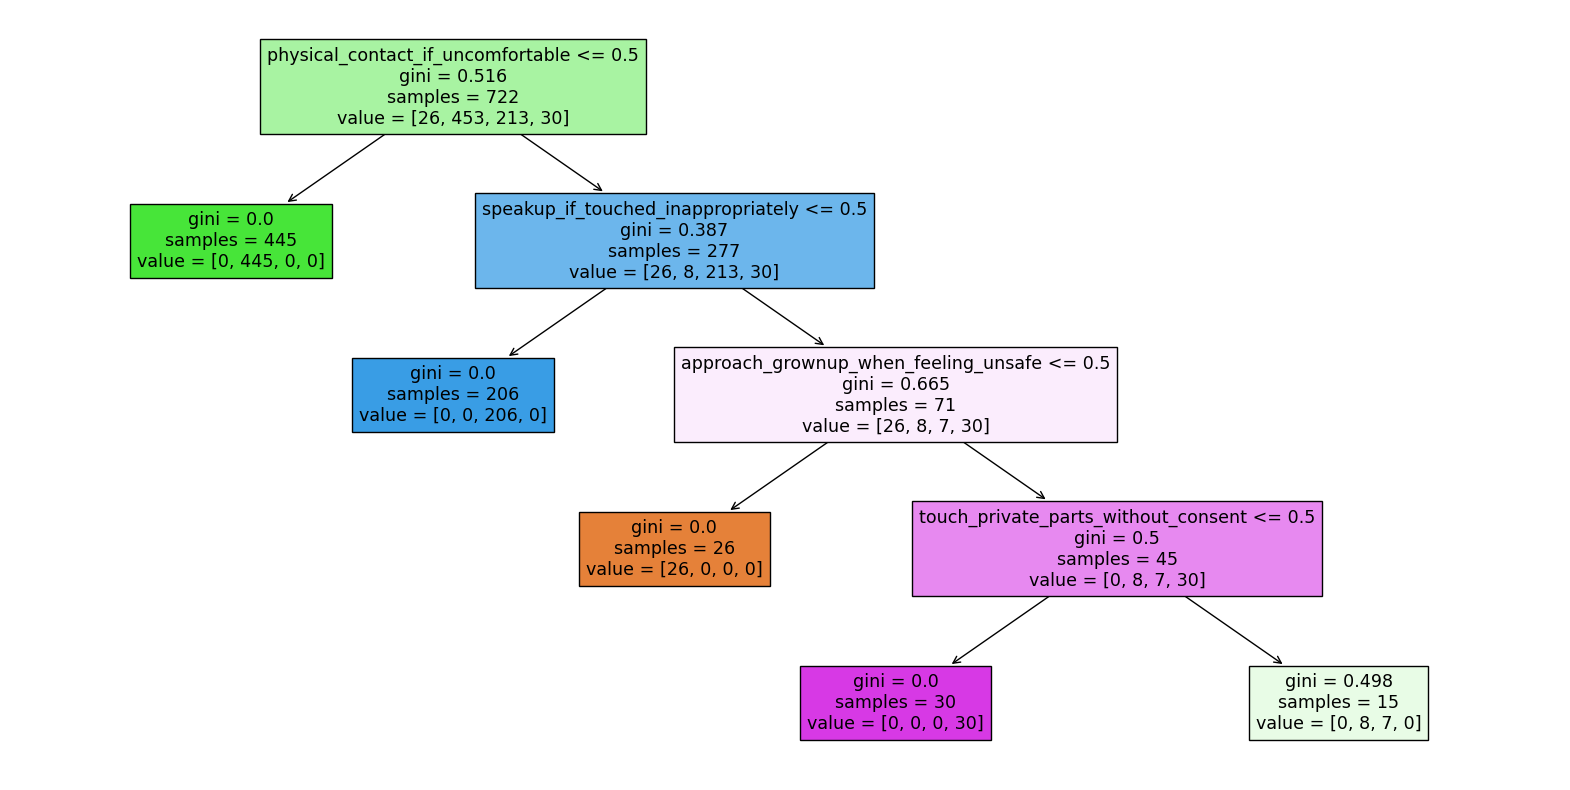

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the decision tree classifier with pruning
pruned_clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the pruned decision tree classifier
pruned_clf.fit(X_train_1, y_train_1)

# Evaluate the pruned model on the test set
y_pred_pruned_1 = pruned_clf.predict(X_val_1)

# Print classification report
print(classification_report(y_val_1, y_pred_pruned_1))

# Visualize the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=X_train_1.columns)
plt.show()

In [ ]:
len(y_train_1), len(y_val_1), len(y_test_1)

(722, 128, 150)

In [ ]:
accuracy_score(y_pred_pruned_1, y_val_1)

0.9921875

                                                                                                               precision    recall  f1-score   support

If you ever feel scared or uncomfortable, talk to a grown-up you trust. They are there to help you feel safe.       1.00      1.00      1.00         8
          It's okay to set boundaries with physical contact. You have the right to feel comfortable and safe.       0.99      1.00      1.00       101
        Trust yourself. If something feels wrong, tell a grown-up you trust. You have the right to feel safe.       1.00      0.97      0.99        37
                            Your body is yours. You have the right to feel safe and decide who can touch you.       1.00      1.00      1.00         4

                                                                                                     accuracy                           0.99       150
                                                                                            

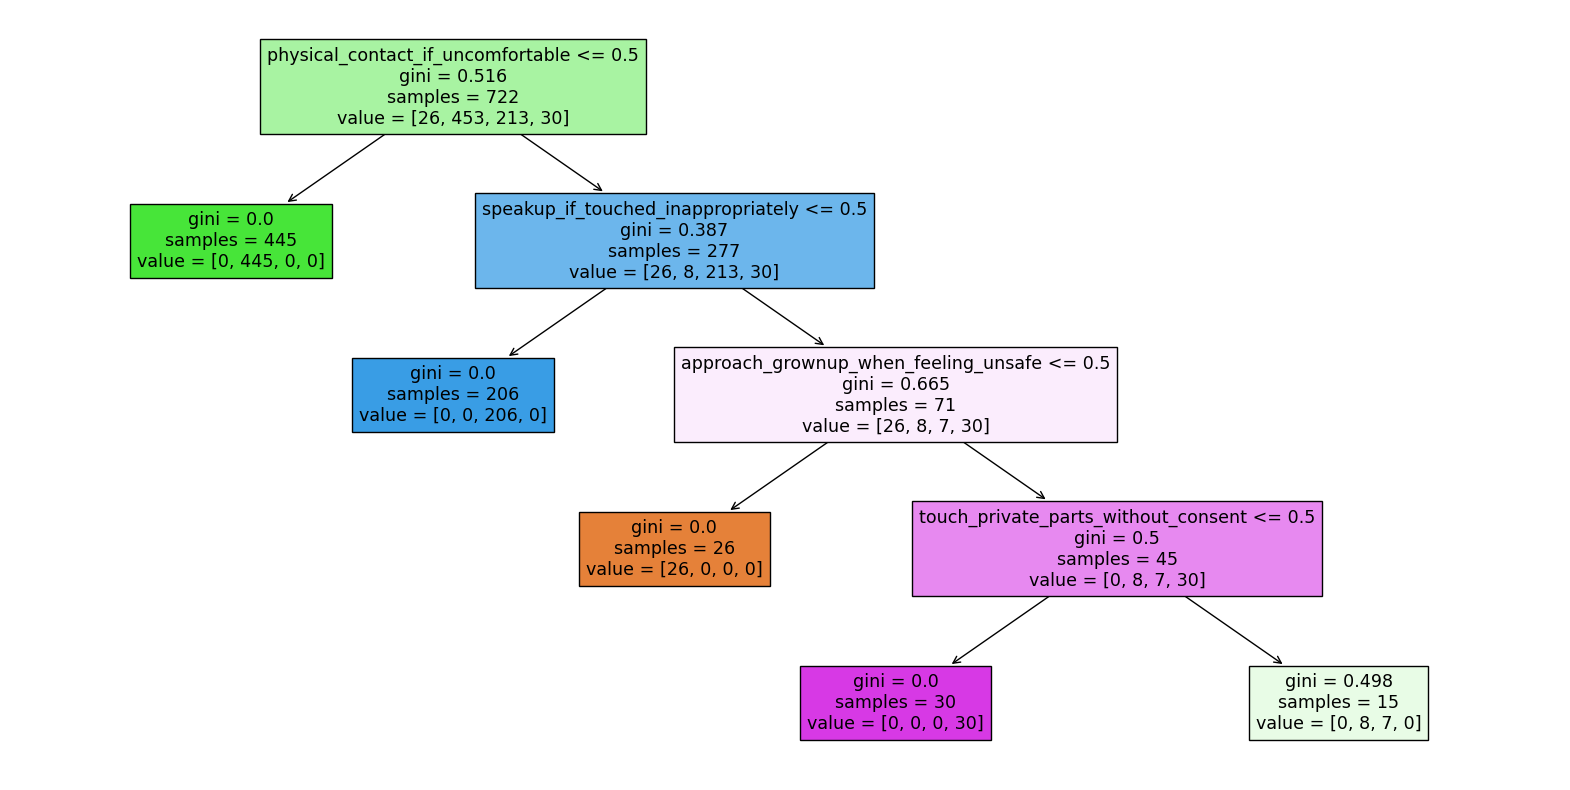

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the decision tree classifier with pruning
pruned_clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the pruned decision tree classifier
pruned_clf.fit(X_train_1, y_train_1)

# Evaluate the pruned model on the test set
y_pred_pruned_1 = pruned_clf.predict(X_test_1)

# Print classification report
print(classification_report(y_test_1, y_pred_pruned_1))

# Visualize the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=X_train_1.columns)
plt.show()

In [ ]:
y_preds_1 = clf.predict(X_test_1)
accuracy_score(y_preds_1, y_test_1)

0.9666666666666667

In [ ]:
print(confusion_matrix(y_preds_1, y_test_1))

[[  8   0   0   0]
 [  0 100   0   0]
 [  0   1  37   4]
 [  0   0   0   0]]


In [ ]:
print(classification_report(y_test_1, y_preds_1))

                                                                                                               precision    recall  f1-score   support

If you ever feel scared or uncomfortable, talk to a grown-up you trust. They are there to help you feel safe.       1.00      1.00      1.00         8
          It's okay to set boundaries with physical contact. You have the right to feel comfortable and safe.       1.00      0.99      1.00       101
        Trust yourself. If something feels wrong, tell a grown-up you trust. You have the right to feel safe.       0.88      1.00      0.94        37
                            Your body is yours. You have the right to feel safe and decide who can touch you.       0.00      0.00      0.00         4

                                                                                                     accuracy                           0.97       150
                                                                                            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_pred_pruned_1, y_test_1)

0.9933333333333333

In [ ]:
print(confusion_matrix(y_pred_pruned_1, y_test_1))

[[  8   0   0   0]
 [  0 101   1   0]
 [  0   0  36   0]
 [  0   0   0   4]]


##Cleanliness

In [ ]:
df = cleanliness
cleanliness.head()

,Name,Age,State,Latitude,Longitude,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails,message
0,Rohan Bora,5,Tamil Nadu,10.480228,77.831914,No,Yes,No,No,Yes,Take care of your teeth for a healthy smile an...
1,Aniruddh Rajagopalan,8,Haryana,28.370631,75.980711,Yes,Yes,No,Yes,Yes,Take care of your teeth for a healthy smile an...
2,Manjari Kade,6,Gujarat,22.689830,70.582061,No,No,No,No,Yes,Take care of your teeth for a healthy smile an...
3,Pihu Mane,8,Chandigarh,30.638282,77.611663,No,No,Yes,Yes,No,Keep your nails clean for good hygiene and ove...
4,Samarth Gera,7,Puducherry,11.618256,79.630037,No,No,No,No,No,Keep your nails clean for good hygiene and ove...


In [ ]:
df.drop(['Name', 'Age', "State", "Latitude", "Longitude"], axis=1, inplace=True)
df.head()

,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails,message
0,No,Yes,No,No,Yes,Take care of your teeth for a healthy smile an...
1,Yes,Yes,No,Yes,Yes,Take care of your teeth for a healthy smile an...
2,No,No,No,No,Yes,Take care of your teeth for a healthy smile an...
3,No,No,Yes,Yes,No,Keep your nails clean for good hygiene and ove...
4,No,No,No,No,No,Keep your nails clean for good hygiene and ove...


In [ ]:
df["garbage_disposal"] = df["garbage_disposal"].map({"Yes": 1, "No":0})
df["importance_of_clean_surrounding"] = df["importance_of_clean_surrounding"].map({"Yes": 1, "No":0})
df["dental_care"] = df["dental_care"].map({"Yes": 1, "No":0})
df["sickness_prevention"] = df["sickness_prevention"].map({"Yes": 1, "No":0})
df["clean_nails"] = df["clean_nails"].map({"Yes": 1, "No":0})

In [ ]:
df.head()

,garbage_disposal,importance_of_clean_surrounding,dental_care,sickness_prevention,clean_nails,message
0,0,1,0,0,1,Take care of your teeth for a healthy smile an...
1,1,1,0,1,1,Take care of your teeth for a healthy smile an...
2,0,0,0,0,1,Take care of your teeth for a healthy smile an...
3,0,0,1,1,0,Keep your nails clean for good hygiene and ove...
4,0,0,0,0,0,Keep your nails clean for good hygiene and ove...


In [ ]:
df.isna().sum()

garbage_disposal                   0
importance_of_clean_surrounding    0
dental_care                        0
sickness_prevention                0
clean_nails                        0
message                            0
dtype: int64

In [ ]:
df.message.ffill(inplace=True)

In [ ]:
X_2 = df.drop(["message"], axis=1)
y_2 = df["message"]

In [ ]:
X_TRAIN_2, X_test_2, y_TRAIN_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.15, random_state=42)

In [ ]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_TRAIN_2, y_TRAIN_2, test_size=0.15, random_state=42)

In [ ]:
len(X_train_2), len(X_val_2), len(X_test_2), len(y_train_2), len(y_val_2), len(y_test_2)

(722, 128, 150, 722, 128, 150)

In [ ]:
tfidf = TfidfVectorizer()
clf = DecisionTreeClassifier()

In [ ]:
y_train_2.unique()

array(['Keep your nails clean for good hygiene and overall well-being.',
       'Take care of your teeth for a healthy smile and overall well-being.',
       'A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.',
       'Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.'],
      dtype=object)

In [ ]:
y_train_new_2 = tfidf.fit_transform(y_train_2)

In [ ]:
y_train_2

219    Keep your nails clean for good hygiene and ove...
135    Keep your nails clean for good hygiene and ove...
77     Keep your nails clean for good hygiene and ove...
201    Keep your nails clean for good hygiene and ove...
747    Take care of your teeth for a healthy smile an...
                             ...                        
734    A clean environment is important for staying h...
519    Keep your nails clean for good hygiene and ove...
18     Keep your nails clean for good hygiene and ove...
407    Keep your nails clean for good hygiene and ove...
789    Keep your nails clean for good hygiene and ove...
Name: message, Length: 722, dtype: object

In [ ]:
n_bins = 3
strategy = 'uniform'
encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

# Initialize LabelEncoder to convert text labels to numerical categories
label_encoder = LabelEncoder()

# Convert text labels to numerical categories
numerical_labels_2 = label_encoder.fit_transform(y_train_2)

In [ ]:
discrete_labels_2 = encoder.fit_transform(numerical_labels_2.reshape(-1, 1))

In [ ]:
# Convert the discrete labels back to text categories
discrete_text_labels_2 = label_encoder.inverse_transform(discrete_labels_2.flatten().astype(int))

In [ ]:
clf.fit(X_train_2, discrete_text_labels_2)

DecisionTreeClassifier()

In [ ]:
y_pred_2 = clf.predict(X_val_2)

In [ ]:
print(classification_report(y_pred_2, y_val_2))

                                                                                                                                                                 precision    recall  f1-score   support

                                           A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.       1.00      1.00      1.00         7
                                                                                                 Keep your nails clean for good hygiene and overall well-being.       1.00      0.98      0.99        84
Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.       0.86      0.16      0.27        37
                                                                                            Take care of your teeth for a healthy smile and overall well-being.       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_pred_2, y_val_2))

[[ 7  0  0  0]
 [ 0 82  1  1]
 [ 0  0  6 31]
 [ 0  0  0  0]]


In [ ]:
y_preds_2 = clf.predict(X_test_2)

In [ ]:
print(classification_report(y_preds_2, y_test_2))

                                                                                                                                                                 precision    recall  f1-score   support

                                           A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.       1.00      1.00      1.00        10
                                                                                                 Keep your nails clean for good hygiene and overall well-being.       1.00      0.98      0.99        95
Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.       1.00      0.18      0.30        45
                                                                                            Take care of your teeth for a healthy smile and overall well-being.       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                                 precision    recall  f1-score   support

                                           A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.       1.00      1.00      1.00         7
                                                                                                 Keep your nails clean for good hygiene and overall well-being.       0.98      1.00      0.99        82
Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.       1.00      0.86      0.92         7
                                                                                            Take care of your teeth for a healthy smile and overall well-being.       1.00      0.97      0.98     

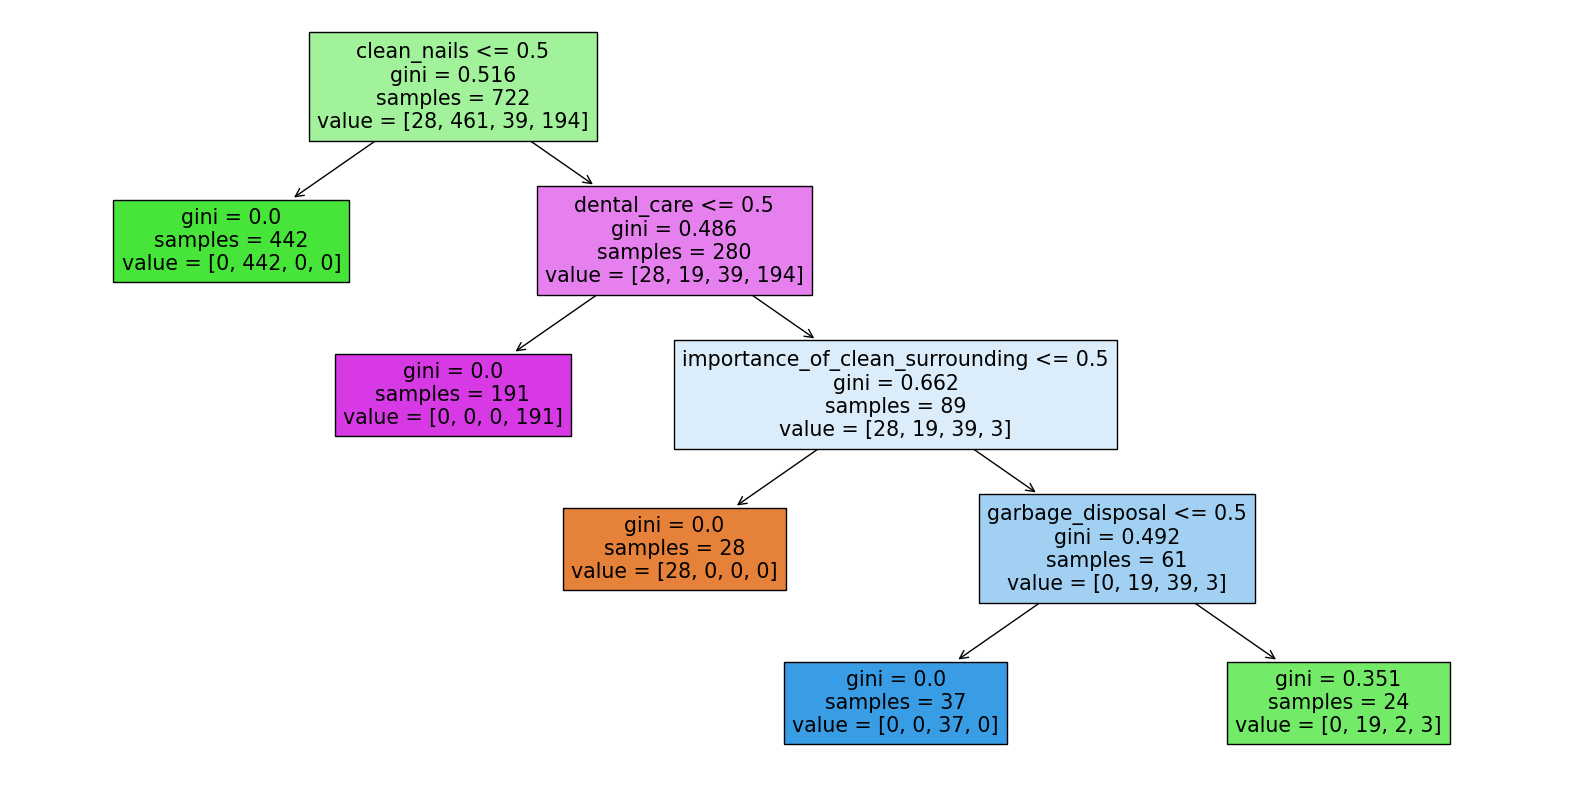

In [ ]:
# Define the decision tree classifier with pruning
pruned_clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the pruned decision tree classifier
pruned_clf.fit(X_train_2, y_train_2)

# Evaluate the pruned model on the validation set
y_pred_pruned_2 = pruned_clf.predict(X_val_2)

# Print classification report
print(classification_report(y_val_2, y_pred_pruned_2))

# Visualize the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=X_train_2.columns)
plt.show()

In [ ]:
print(classification_report(y_pred_pruned_2, y_val_2))

                                                                                                                                                                 precision    recall  f1-score   support

                                           A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.       1.00      1.00      1.00         7
                                                                                                 Keep your nails clean for good hygiene and overall well-being.       1.00      0.98      0.99        84
Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.       0.86      1.00      0.92         6
                                                                                            Take care of your teeth for a healthy smile and overall well-being.       0.97      1.00      0.98     

In [ ]:
print(confusion_matrix(y_pred_2, y_val_2))

[[ 7  0  0  0]
 [ 0 82  1  1]
 [ 0  0  6 31]
 [ 0  0  0  0]]


                                                                                                                                                                 precision    recall  f1-score   support

                                           A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.       1.00      1.00      1.00        10
                                                                                                 Keep your nails clean for good hygiene and overall well-being.       0.98      1.00      0.99        93
Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.       1.00      1.00      1.00         8
                                                                                            Take care of your teeth for a healthy smile and overall well-being.       1.00      0.95      0.97     

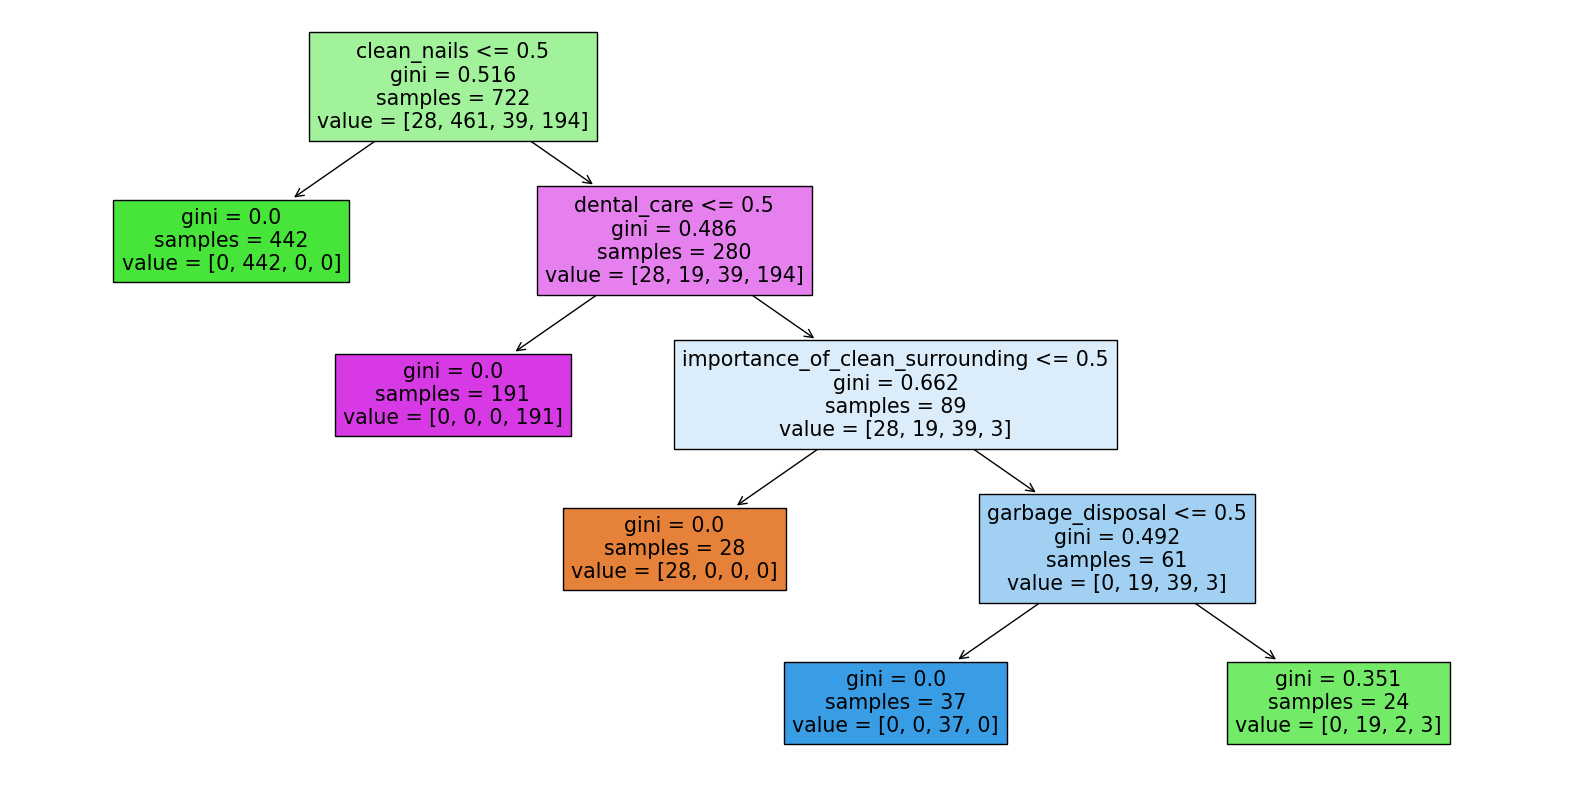

In [ ]:
# Define the decision tree classifier with pruning
pruned_clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the pruned decision tree classifier
pruned_clf.fit(X_train_2, y_train_2)

# Evaluate the pruned model on the test set
y_pred_pruned_2 = pruned_clf.predict(X_test_2)

# Print classification report
print(classification_report(y_test_2, y_pred_pruned_2))

# Visualize the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=X_train_2.columns)
plt.show()

In [ ]:
print(confusion_matrix(y_pred_pruned_2, y_test_2))

[[10  0  0  0]
 [ 0 93  0  2]
 [ 0  0  8  0]
 [ 0  0  0 37]]


In [ ]:
print(classification_report(y_pred_pruned_2, y_test_2))

                                                                                                                                                                 precision    recall  f1-score   support

                                           A clean environment is important for staying healthy. Remember the importance of cleanliness for overall well-being.       1.00      1.00      1.00        10
                                                                                                 Keep your nails clean for good hygiene and overall well-being.       1.00      0.98      0.99        95
Proper garbage disposal is important for maintaining cleanliness and preventing pollution. Remember to dispose of garbage properly for a healthier environment.       1.00      1.00      1.00         8
                                                                                            Take care of your teeth for a healthy smile and overall well-being.       0.95      1.00      0.97     

##Education

In [ ]:
education.isna().sum()

Name                 0
Age                  0
State                0
Latitude             0
Longitude            0
school_access        0
has_teacher          0
study_material       0
likes_learning       0
learn_with_others    0
message              0
dtype: int64

In [ ]:
education['message'].ffill(inplace=True)

In [ ]:
df = education
education.head()

,Name,Age,State,Latitude,Longitude,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
0,Saksham Kale,8,West Bengal,22.574937,88.232444,Yes,Yes,No,No,No,Knowledge increases when you share it with oth...
1,Divit Tailor,5,Karnataka,16.153712,76.563972,Yes,No,No,Yes,No,Knowledge increases when you share it with oth...
2,Onkar Devi,10,Meghalaya,25.052918,90.564303,Yes,No,No,No,No,Knowledge increases when you share it with oth...
3,Tushar Sarna,5,Maharashtra,20.192017,74.759501,No,Yes,Yes,No,Yes,Try learning on your own. Don't let your curio...
4,Raunak Kothari,7,Nagaland,25.269908,94.618083,Yes,Yes,Yes,No,No,Knowledge increases when you share it with oth...


In [ ]:
df.drop(['Name', 'Age', "State", "Latitude", "Longitude"], axis=1, inplace=True)
df.head()

,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
0,Yes,Yes,No,No,No,Knowledge increases when you share it with oth...
1,Yes,No,No,Yes,No,Knowledge increases when you share it with oth...
2,Yes,No,No,No,No,Knowledge increases when you share it with oth...
3,No,Yes,Yes,No,Yes,Try learning on your own. Don't let your curio...
4,Yes,Yes,Yes,No,No,Knowledge increases when you share it with oth...


In [ ]:
df["school_access"] = df["school_access"].map({"Yes": 1, "No":0})
df["has_teacher"] = df["has_teacher"].map({"Yes": 1, "No":0})
df["study_material"] = df["study_material"].map({"Yes": 1, "No":0})
df["likes_learning"] = df["likes_learning"].map({"Yes": 1, "No":0})
df["learn_with_others"] = df["learn_with_others"].map({"Yes": 1, "No":0})
df.head()

,school_access,has_teacher,study_material,likes_learning,learn_with_others,message
0,1,1,0,0,0,Knowledge increases when you share it with oth...
1,1,0,0,1,0,Knowledge increases when you share it with oth...
2,1,0,0,0,0,Knowledge increases when you share it with oth...
3,0,1,1,0,1,Try learning on your own. Don't let your curio...
4,1,1,1,0,0,Knowledge increases when you share it with oth...


In [ ]:
X_3 = df.drop("message", axis=1)
y_3 = df["message"]

In [ ]:
X_TRAIN_3, X_test_3, y_TRAIN_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.15, random_state=42)

In [ ]:
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_TRAIN_3, y_TRAIN_3, test_size=0.15, random_state=42)
len(X_train_3), len(X_val_3), len(X_test_3), len(y_train_3), len(y_val_3), len(y_test_3)

(722, 128, 150, 722, 128, 150)

In [ ]:
X_train_3.shape, y_train_3.shape

((722, 5), (722,))

In [ ]:
y_train_new_3 = tfidf.fit_transform(y_train_3)

In [ ]:
y_train_new_3.toarray().shape

(722, 48)

In [ ]:
n_bins = 3
strategy = 'uniform'  # Other strategies: 'quantile', 'kmeans'
encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)

In [ ]:
# Initialize LabelEncoder to convert text labels to numerical categories
label_encoder = LabelEncoder()

# Convert text labels to numerical categories
numerical_labels_3 = label_encoder.fit_transform(y_train_3)

In [ ]:
print(numerical_labels_3)

In [ ]:
discrete_labels_3 = encoder.fit_transform(numerical_labels_3.reshape(-1, 1))

In [ ]:
print(discrete_labels_3)

In [ ]:
# Convert the discrete labels back to text categories
discrete_text_labels_3 = label_encoder.inverse_transform(discrete_labels_3.flatten().astype(int))

In [ ]:
print(discrete_text_labels_3)

['Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.'
 'Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.'
 'Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.'
 "Try learning on your own. Don't let your curiosity and willingness to learn go away."
 "Try learning on your own. Don't let your curiosity and willingness to learn go away."
 "Try learning on your own. Don't let your curiosity and willingness to learn go away."
 "Try learning on your own. Don't let your curiosity and willingness to learn go away."
 'Be your own teacher! Try to learn on your own and never give up.'
 'Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.'
 'Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.'
 "Try learning on your own. Don't l

In [ ]:
clf.fit(X_train_3, discrete_text_labels_3)

DecisionTreeClassifier()

In [ ]:
y_pred_3 = clf.predict(X_val_3)

In [ ]:
accuracy_score(y_pred_3, y_val_3)

0.65625

In [ ]:
y_preds_3 = clf.predict(X_test_3)
accuracy_score(y_preds_3, y_test_3)

0.7066666666666667

In [ ]:
print(classification_report(y_test_3, y_preds_3))

                                                                                                                   precision    recall  f1-score   support

                                                 Be your own teacher! Try to learn on your own and never give up.       1.00      1.00      1.00         9
        Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.       0.99      0.99      0.99        96
                             Try learning on your own. Don't let your curiosity and willingness to learn go away.       0.04      1.00      0.09         2
Try making notes of your own. They would help you understand the concepts even if you do not have study material!       0.00      0.00      0.00        43

                                                                                                         accuracy                           0.71       150
                                                                    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                   precision    recall  f1-score   support

                                                 Be your own teacher! Try to learn on your own and never give up.       1.00      1.00      1.00         9
        Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.       0.98      1.00      0.99        96
                             Try learning on your own. Don't let your curiosity and willingness to learn go away.       1.00      1.00      1.00         2
Try making notes of your own. They would help you understand the concepts even if you do not have study material!       1.00      0.95      0.98        43

                                                                                                         accuracy                           0.99       150
                                                                    

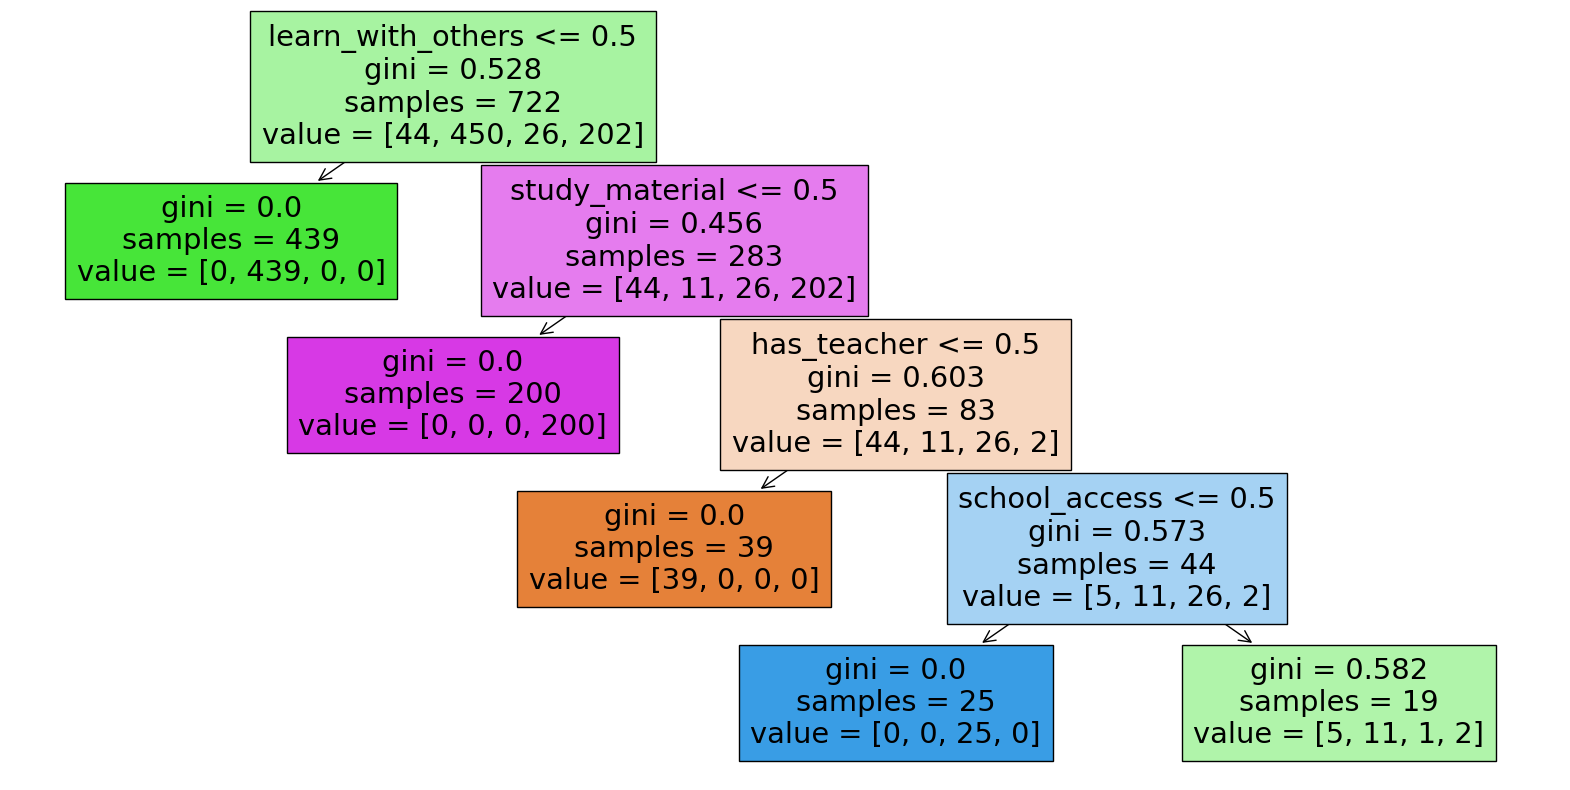

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the decision tree classifier with pruning
pruned_clf = DecisionTreeClassifier(ccp_alpha=0.01)

# Train the pruned decision tree classifier
pruned_clf.fit(X_train_3, y_train_3)

# Evaluate the pruned model on the test set
y_pred_pruned_3 = pruned_clf.predict(X_test_3)

# Print classification report
print(classification_report(y_test_3, y_pred_pruned_3))

# Visualize the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_clf, filled=True, feature_names=X_train_3.columns)
plt.show()

In [ ]:
accuracy_score(y_pred_pruned_3, y_test_3)

0.9866666666666667

In [ ]:
print(confusion_matrix(y_pred_pruned_3, y_test_3))

[[ 9  0  0  0]
 [ 0 96  0  2]
 [ 0  0  2  0]
 [ 0  0  0 41]]


In [ ]:
y_pred_pruned_3

array(['Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       'Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.',
       'Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       'Be your own teacher! Try to learn on your own and never give up.',
       'Knowledge increases when you share it with others. Make learning enjoyable by studying with your friends.',
       'Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       'Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       'Try making notes of your own. They would help you understand the concepts even if you do not have study material!',
       'Knowledge increases when you share it with others. Make learning 

In [ ]:
import joblib

joblib.dump(tfidf, "TfidfVectorizer.joblib")
joblib.dump(clf, "DecisionTree.joblib")
joblib.dump(pruned_clf, "PrunedDecisionTree.joblib")

['PrunedDecisionTree.joblib']